## Imports

In [34]:
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # data visualization
import matplotlib.cm as cm # Creating color bar
import matplotlib.colors as mcolors # Creating color bar
import seaborn as sns # data visualization
import folium
from folium.plugins import HeatMap, HeatMapWithTime
import warnings # ignore warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import calplot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import scipy.stats as stats
import os

## Loading data

In [35]:
# Specify the full path to the CSV file
#file_path = r"C:\Users\poltr\OneDrive - udl.cat\Desktop\Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"
file_path = r"C:/Users/clara/OneDrive/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"
#file_path = r"C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Kandidat\Social Data Analysis and Visualization\Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"

# Read data from the specified file
df = pd.read_csv(file_path)

# Preview the first 5 lines of the loaded data
df.head()

,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
0,ROBBERY,INGLESIDE,-122.420084,37.708311,17,Monday,22,November,2004
1,VEHICLE THEFT,PARK,-120.500000,90.000000,20,Tuesday,18,October,2005
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2,Sunday,15,February,2004
3,ASSAULT,SOUTHERN,-122.410541,37.770913,17,Sunday,21,November,2010
4,ASSAULT,TARAVAL,-122.470366,37.745158,15,Tuesday,2,April,2013


### Creating heatmap

C:\Users\clara\AppData\Local\Temp\ipykernel_20664\1309370769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_larceny['Year'] = df_larceny['Date'].dt.year


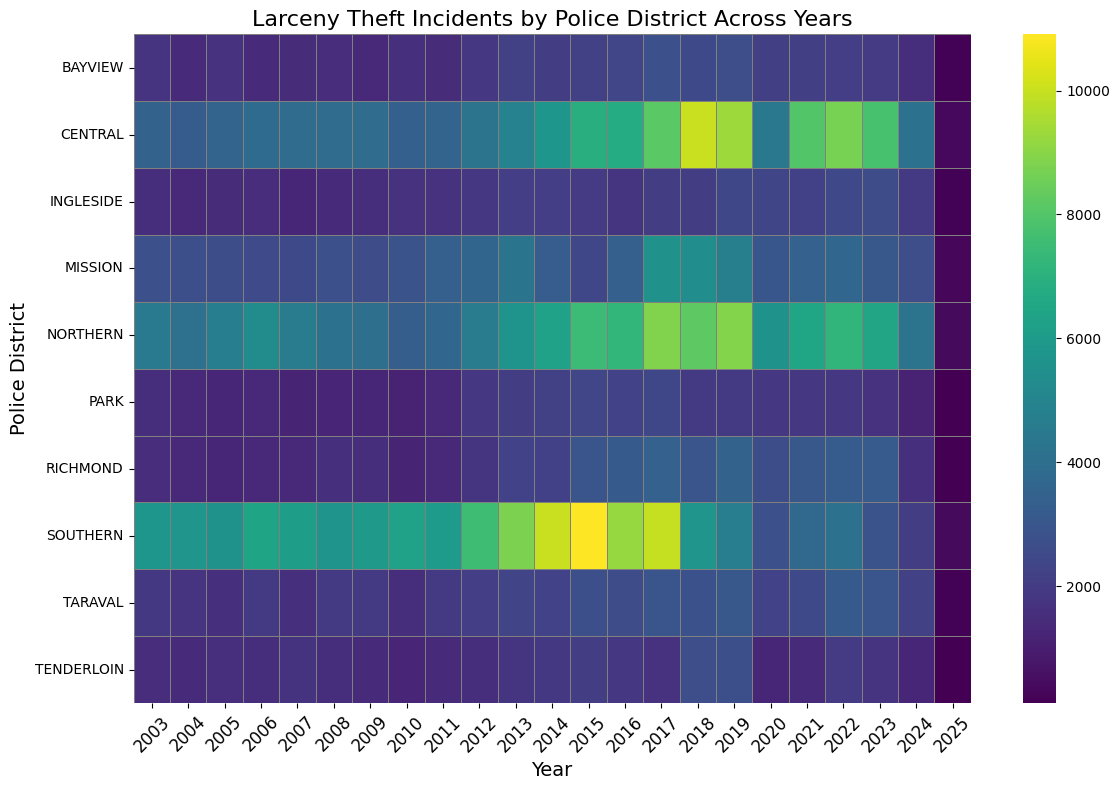

In [41]:
# Create the directory if it doesn't exist
os.makedirs('Figure', exist_ok=True)

# Filter data for "Larceny Theft" only
df_larceny = df_focus[df_focus['Category'] == 'LARCENY/THEFT']

# Extract year from your date column
df_larceny['Year'] = df_larceny['Date'].dt.year

# Group by district and year
heatmap_data = df_larceny.groupby(['PdDistrict', 'Year']).size().unstack(fill_value=0)

# Create heatmap
plt.figure(figsize=(12, 8))
cmap = sns.color_palette("viridis", as_cmap=True)

# Removed the 'annot=True' parameter to hide the numbers
sns.heatmap(heatmap_data, cmap=cmap, linewidths=0.5, linecolor='gray')

# Titles and labels
plt.title("Larceny Theft Incidents by Police District Across Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Police District", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Save the figure
plt.savefig('Figure/heatmap_larceny_theft.png', dpi=300, bbox_inches='tight')

# Optional: close the figure to free memory
plt.close()